In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'PIL'

In [4]:
db= pd.read_csv(r'C:\Users\User\Desktop\CAPSTONE\da_capstone_group3\Team3_App\data\database.csv', header=0)
db.describe()

,quality_score,carbon_intensity,sustainable_impact_exposure,sri_screening_criteria_exposure,efficiency,tradability,fit,one_mo_p_percent,three_mo_p_percent,ytd_p_percent,one_yr_p_percent,three_yr_p_percent,five_yr_p_percent,ten_yr_p_percent
count,1669.000000,2112.000000,1967.000000,974.000000,3037.000000,2927.000000,2730.000000,1585.000000,926.000000,2.284000e+03,2.739000e+03,2.933000e+03,3.011000e+03,3.085000e+03
mean,7.792642,80.610942,71.831215,70.337526,7.157122,11.548514,8.300656,2.936088,3.485799,2.713630e+07,5.319303e+07,8.916995e+07,1.785318e+08,6.545370e+08
std,8.718748,12.851258,23.558416,20.355578,12.408429,23.870487,17.623007,10.490517,11.441636,4.147872e+08,5.870920e+08,9.064256e+08,1.376478e+09,3.952806e+09
min,0.010000,8.000000,4.000000,2.000000,-72.420000,-86.870000,-96.490000,-76.220000,-77.340000,-4.984350e+09,-3.382570e+09,-8.706910e+09,-1.038009e+10,-1.619798e+10
25%,3.360000,73.000000,52.000000,58.000000,1.330000,3.030000,1.092500,1.210000,1.450000,-4.095000e+06,-8.590000e+06,-1.087000e+07,-9.150000e+06,1.630000e+06
50%,6.270000,82.000000,75.000000,73.000000,6.260000,9.450000,9.525000,4.300000,4.685000,1.000000e+06,5.300000e+05,1.560000e+06,3.810000e+06,3.500000e+07
75%,9.570000,91.000000,95.000000,87.000000,11.470000,15.620000,15.950000,8.220000,9.555000,1.228500e+07,2.068500e+07,3.750000e+07,6.101500e+07,2.220400e+08
max,98.020000,122.310000,100.000000,100.000000,134.570000,400.060000,308.860000,32.680000,43.740000,9.917650e+09,1.615885e+10,2.322101e+10,3.507396e+10,1.102676e+11


In [5]:
db.drop('sustainable_impact_exposure', axis=1, inplace=True)
db.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3168 entries, (0, 0, 'SPY', 17.03, 0.09, 425980000000.0, 1.6, 'SPDR S&P 500d: 0', 'ticker', 'one_yr_return') to (3167, 3167, 'CETF', nan, 0.85, nan, nan, 'DriveWealth ICE 100 Index ETF', nan, nan)
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2080 non-null   object 
 1   Unnamed_yield                    2040 non-null   object 
 2   fundname                         1991 non-null   object 
 3   esg_rating                       1 non-null      object 
 4   quality_score                    1669 non-null   float64
 5   score_peer_rank                  3168 non-null   object 
 6   score_global_rank                1520 non-null   object 
 7   carbon_intensity                 2112 non-null   float64
 8   sri_screening_criteria_exposure  974 non-null    float64
 9   analyst_pick                     

In [6]:
db = db.drop('Unnamed: 0.1', axis=1)
db = db.drop('Unnamed: 0', axis=1)
db.describe()

KeyError: "['Unnamed: 0.1'] not found in axis"

In [13]:
df = pd.read_csv(r'C:\Users\User\Desktop\CAPSTONE\da_capstone_group3\Team3_App\data\df_merged_etf_fixed.csv')
df.columns

Index(['Unnamed: 0', 'ticker', 'one_yr_return', 'expense_ratio', 'aum',
       'dividend_yield', 'fundname', 'esg_rating', 'quality_score',
       'score_peer_rank', 'score_global_rank', 'carbon_intensity',
       'sustainable_impact_exposure', 'sri_screening_criteria_exposure',
       'analyst_pick', 'grade', 'efficiency', 'tradability', 'fit', 'segment',
       'one_mo_p_percent', 'three_mo_p_percent', 'ytd_p_percent',
       'one_yr_p_percent', 'three_yr_p_percent', 'five_yr_p_percent',
       'ten_yr_p_percent', 'one_mo', 'three_mo', 'ytd', 'one_yr', 'three_yr',
       'as_of_date'],
      dtype='object')

In [14]:
df_filter = pd.read_csv(r'C:\Users\User\Desktop\CAPSTONE\da_capstone_group3\Team3_App\data\app_df1.csv')
df_filter= df_filter[['investment_strategy','asset_class','asset_region','subsegment']]
df = df.merge(df_filter, left_index=True, right_index=True, how='left')
df.head()

,Unnamed: 0,ticker,one_yr_return,expense_ratio,aum,dividend_yield,fundname,esg_rating,quality_score,score_peer_rank,...,one_mo,three_mo,ytd,one_yr,three_yr,as_of_date,investment_strategy,asset_class,asset_region,subsegment
0,0,SPY,17.03,0.09,4.259800e+11,1.60,SPDR S&P 500 ETF Trust,A,6.68,58.71,...,2.691510e+09,8.169170e+09,1.789010e+09,1.330168e+10,2.274163e+10,2023-07-25,standard,equity,us,large_cap
1,1,IVV,17.08,0.03,3.516200e+11,1.60,iShares Core S&P 500 ETF,A,6.68,58.67,...,9.267710e+09,1.079041e+10,8.072130e+09,1.406733e+10,6.043107e+10,2023-07-25,standard,equity,us,large_cap
2,2,VOO,17.09,0.03,3.363100e+11,1.60,Vanguard 500 Index Fund,A,6.68,58.75,...,9.917650e+09,1.615885e+10,2.322101e+10,3.507396e+10,1.102676e+11,2023-07-25,standard,equity,us,large_cap
3,3,VTI,16.46,0.03,3.196800e+11,1.56,Vanguard Total Stock Market ETF,A,6.52,52.51,...,2.046560e+09,6.017330e+09,9.869710e+09,2.185189e+10,1.007913e+11,2023-07-25,standard,equity,us,total_market
4,4,QQQ,27.05,0.20,2.093000e+11,0.75,Invesco QQQ Trust,A,6.71,59.94,...,7.232160e+09,8.995940e+09,4.850110e+09,4.059080e+09,3.413248e+10,2023-07-25,standard,equity,us,large_cap


In [15]:
df.to_csv(r'C:\Users\User\Desktop\CAPSTONE\da_capstone_group3\Team3_App\data\database.csv')

In [16]:

filtered_df = df.ticker.query('investment_strategy == standard')
filtered_df.head()

AttributeError: 'Series' object has no attribute 'query'

In [17]:
performance = df[['one_mo_p_percent', 'three_mo_p_percent', 'ytd_p_percent',
       'one_yr_p_percent', 'three_yr_p_percent', 'five_yr_p_percent',
       'ten_yr_p_percent']]



In [18]:
performance

,one_mo_p_percent,three_mo_p_percent,ytd_p_percent,one_yr_p_percent,three_yr_p_percent,five_yr_p_percent,ten_yr_p_percent
0,5.13,12.57,20.00,17.03,14.09,11.79,12.48
1,5.14,12.61,20.04,17.08,14.15,11.82,12.54
2,5.15,12.62,20.09,17.09,14.15,11.82,12.55
3,5.56,12.94,19.61,16.46,13.42,10.98,11.98
4,4.48,22.36,42.66,27.05,14.71,16.50,18.66
...,...,...,...,...,...,...,...
3163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3164,-17.10,-58.45,-74.30,NaN,NaN,NaN,NaN
3165,NaN,NaN,NaN,NaN,-24.56,-13.17,NaN
3166,4.45,7.88,NaN,NaN,NaN,NaN,NaN


In [19]:
performance = pd.DataFrame(performance)
performance.rename(columns={'one_mo_p_percent': '-1', 'three_mo_p_percent': '-3', 'ytd_p_percent': '-9', 'one_yr_p_percent': '-12', 'three_yr_p_percent': '-36', 'five_yr_p_percent': '-60', 'ten_yr_p_percent': '-120'}, inplace=True)
performance.head()

,-1,-3,-9,-12,-36,-60,-120
0,5.13,12.57,20.00,17.03,14.09,11.79,12.48
1,5.14,12.61,20.04,17.08,14.15,11.82,12.54
2,5.15,12.62,20.09,17.09,14.15,11.82,12.55
3,5.56,12.94,19.61,16.46,13.42,10.98,11.98
4,4.48,22.36,42.66,27.05,14.71,16.50,18.66


In [20]:
performance= performance.merge(df.ticker, left_index=True, right_index=True)
performance.head()

,-1,-3,-9,-12,-36,-60,-120,ticker
0,5.13,12.57,20.00,17.03,14.09,11.79,12.48,SPY
1,5.14,12.61,20.04,17.08,14.15,11.82,12.54,IVV
2,5.15,12.62,20.09,17.09,14.15,11.82,12.55,VOO
3,5.56,12.94,19.61,16.46,13.42,10.98,11.98,VTI
4,4.48,22.36,42.66,27.05,14.71,16.50,18.66,QQQ


In [21]:
performance = performance.set_index('ticker')
performance.head()

,-1,-3,-9,-12,-36,-60,-120
ticker,,,,,,,
SPY,5.13,12.57,20.00,17.03,14.09,11.79,12.48
IVV,5.14,12.61,20.04,17.08,14.15,11.82,12.54
VOO,5.15,12.62,20.09,17.09,14.15,11.82,12.55
VTI,5.56,12.94,19.61,16.46,13.42,10.98,11.98
QQQ,4.48,22.36,42.66,27.05,14.71,16.50,18.66


In [22]:
performance= performance.T
performance.head()

ticker,SPY,IVV,VOO,VTI,QQQ,VEA,VTV,IEFA,BND,AGG,...,PRVT,SPKX,TEGS,TADS,AVNV,AVNM,SPKY,FLRU,SROI,CETF
-1,5.13,5.14,5.15,5.56,4.48,4.87,5.94,4.41,-0.28,-0.31,...,7.4,-11.59,NaN,NaN,NaN,NaN,-17.10,NaN,4.45,3.14
-3,12.57,12.61,12.62,12.94,22.36,4.51,6.31,3.64,-1.72,-1.72,...,NaN,-43.68,NaN,NaN,NaN,NaN,-58.45,NaN,7.88,4.65
-9,20.00,20.04,20.09,19.61,42.66,14.37,6.06,14.25,2.30,2.27,...,NaN,-57.78,NaN,NaN,NaN,NaN,-74.30,NaN,NaN,NaN
-12,17.03,17.08,17.09,16.46,27.05,16.67,11.62,17.42,-2.27,-2.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-36,14.09,14.15,14.15,13.42,14.71,8.66,15.22,8.24,-4.43,-4.39,...,NaN,NaN,-35.53,-75.48,NaN,NaN,NaN,-24.56,NaN,NaN


In [24]:

performance.columns = df.ticker
performance.head(10)

ticker,SPY,IVV,VOO,VTI,QQQ,VEA,VTV,IEFA,BND,AGG,...,PRVT,SPKX,TEGS,TADS,AVNV,AVNM,SPKY,FLRU,SROI,CETF
-1,5.13,5.14,5.15,5.56,4.48,4.87,5.94,4.41,-0.28,-0.31,...,7.4,-11.59,NaN,NaN,NaN,NaN,-17.10,NaN,4.45,3.14
-3,12.57,12.61,12.62,12.94,22.36,4.51,6.31,3.64,-1.72,-1.72,...,NaN,-43.68,NaN,NaN,NaN,NaN,-58.45,NaN,7.88,4.65
-9,20.00,20.04,20.09,19.61,42.66,14.37,6.06,14.25,2.30,2.27,...,NaN,-57.78,NaN,NaN,NaN,NaN,-74.30,NaN,NaN,NaN
-12,17.03,17.08,17.09,16.46,27.05,16.67,11.62,17.42,-2.27,-2.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-36,14.09,14.15,14.15,13.42,14.71,8.66,15.22,8.24,-4.43,-4.39,...,NaN,NaN,-35.53,-75.48,NaN,NaN,NaN,-24.56,NaN,NaN
-60,11.79,11.82,11.82,10.98,16.50,4.50,9.16,4.18,0.79,0.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.17,NaN,NaN
-120,12.48,12.54,12.55,11.98,18.66,5.28,10.27,5.25,1.47,1.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
import seaborn as sns


sns.lineplot(data=performance, x=performance.index, y=performance.SPY, color='red', label='SPY', linewidth=2.0, alpha=0.5)
sns.lineplot(data=performance, x=performance.index, y=performance.IVV, color='cyan', label='IVV', linewidth=2.0, alpha=0.7)
sns.lineplot(data=performance, x=performance.index, y=performance.VOO, color='green',label='VOO', linewidth=2.0, alpha=0.3)
sns.lineplot(data=performance, x=performance.index, y=performance.VTI, color='navy',label='VTI', linewidth=2.0, alpha=0.3)
sns.lineplot(data=performance, x=performance.index, y=performance.QQQ, color='orange', label='QQQ', linewidth=2.0, alpha=0.7)


ModuleNotFoundError: No module named 'PIL'

---------------------------

In [ ]:
for ticker in performance.index:
    df_performance = dict({ticker[i] : (x, y)} for ticker in performance.columns)
    df_performance

In [ ]:
for i in performance:
    performance.index = pd.DataFrame(df['ticker'])

In [ ]:
df_performance = [[ {ticker : (x, y)}] for ticker in performance.columns]


In [ ]:
df_performance = pd.DataFrame(df_performance.reset_index())


In [ ]:
df_performance

In [ ]:
sns.lineplot(data=performance.index[1], x=x, y=y)

In [ ]:
performance = performance.set_index('ticker')
performance.head()

In [ ]:
performance = performance.groupby('ticker')
performance.head()

In [ ]:
perfomance.columns.values.tolist()

In [ ]:
performance_df = pd.DataFrame()

for ticker, ticker_df in performance:
    x=['1 mo', '3 mo', '9 mo', '12 mo', '36 mo', '60 mo', '120 mo']
    i= perfomance.columns[ticker]
    y = i.values.tolist()


    sns.lineplot(data=ts, x=x, y=y, hue=index)

In [ ]:
performance = performance.T

In [ ]:
performance = pd.DataFrame(performance)


performance['month'] = ['1 mo', '3 mo', '9 mo', '12 mo', '36 mo', '60 mo', '120 mo']
performance = performance.set_index('month')
performance.head()

In [ ]:
performance = performance.sortby('ticker')

In [ ]:
sns.lineplot(data=performance.head(1), performance.ticker=['SPY'	,'IVV' , 'VOO',	'VTI',	'QQQ'] palette="tab10", linewidth=0.5)

In [ ]:
performance.to_csv('performance.csv')

In [ ]:
for i in range(3168):
    p[i] = df.ticker[i]
    print(p[i])



In [ ]:
ts = pd.DataFrame(performance, index=df['ticker'])  # Replace index with your tickers
ts.Ticker = df[

In [ ]:
df.ticker

In [ ]:
ts = pd.DataFrame(performance.head(50), index=df['ticker'].head(50))  # Replace index with your tickers

# Plotting
plt.figure(figsize=(10, 30))

for ticker in ts.index:
    plt.plot(ts.columns, ts.loc[ticker])

plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Time Series Comparison for Tickers")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
performance = perfomance.rename(columns={'one_mo_p_percent':'1 Month', 'three_mo_p_percent':'3 Month', 'ytd_p_percent':'9 Month', 'one_yr_p_percent':'1 Year', 'three_yr_p_percent':'3 Year', 'five_yr_p_percent':'5 Year', 'ten_yr_p_percent':'10 Year'})
performance

In [ ]:
month= [1,3,9,12,36,60,120]
def plots():
    for i in performance.ticker:
        plt.figure(figsize=(10,6))
        plt.title([i])
        plt.ylabel('performance [%]')
        plt.xlabel('time in months')
        sns.lineplot(x= month, y= performance.loc[i], )
        plt.show()

In [ ]:
plots()

In [ ]:
month = [1, 3, 9, 12, 36, 60, 120]
ts['SPY'] = pd.DataFrame(indexs=month, index=performance.loc['SPY'])

ts['SPY'] 





In [ ]:
month

In [ ]:
performance = performance.T
performance = performance.rename(columns={'ticker':'month'})
performance = pd.concat([performance, month], axis=0)
performance['month'] = month

In [ ]:
performance.head(20)

In [ ]:
#performance.index =['1', '3', '9', '12', '36', '60', '120']

#performance= performance.drop('level_0', axis=1)
performance= performance.drop('index', axis=1)
performance

In [ ]:

performance

In [ ]:
performance 


In [ ]:
sns.lineplot(data=perfomance, x='index', y='values')

-------

In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import yahooquery as yq
from yahooquery import Ticker
from yfinance import ticker
import googlefinance as gf
from googlefinance import getQuotes
import requests
import json
from json import dumps
from json import loads
import datetime as dt
from datetime import datetime
import streamlit as st


In [63]:
selection = pd.read_csv(r'C:\Users\User\Desktop\CAPSTONE\da_capstone_group3\Team3_App\data\buraks_list49.csv')
selection.head()


,Unnamed: 0,start_config,one_yr_return,expense_ratio,aum,dividend_yield,quality_score,score_peer_rank,score_global_rank,carbon_intensity,...,investment_strategy,asset_region,subsegment,ticker,three_mo_p_percent,dividend_yield_cat,carbon_intensity_cat,aum_cat,quality_score_cat,ranking
0,79,lightgray,21.31,0.11,1.933000e+10,2.99,7.82,94.27,38.17,93.80,...,standard,europe,total_market,VGK,2.80,q4,q2,high,high,NaN
1,159,lightgray,28.67,0.52,8.370000e+09,2.81,7.85,94.72,40.60,123.75,...,standard,europe,total_market,EZU,3.00,q4,q2,high,high,NaN
2,169,lightgray,21.73,0.09,7.660000e+09,2.98,7.91,96.00,51.26,100.13,...,standard,europe,total_market,BBEU,2.41,q4,q2,high,high,NaN
3,259,lightgray,20.95,0.09,4.360000e+09,2.97,7.82,94.14,37.32,101.02,...,standard,europe,total_market,IEUR,2.35,q4,q2,high,high,NaN
4,341,lightgray,15.10,0.50,2.860000e+09,3.84,7.94,96.35,55.57,80.41,...,standard,europe,total_market,EWU,2.00,high,q2,high,high,NaN


KeyError: True

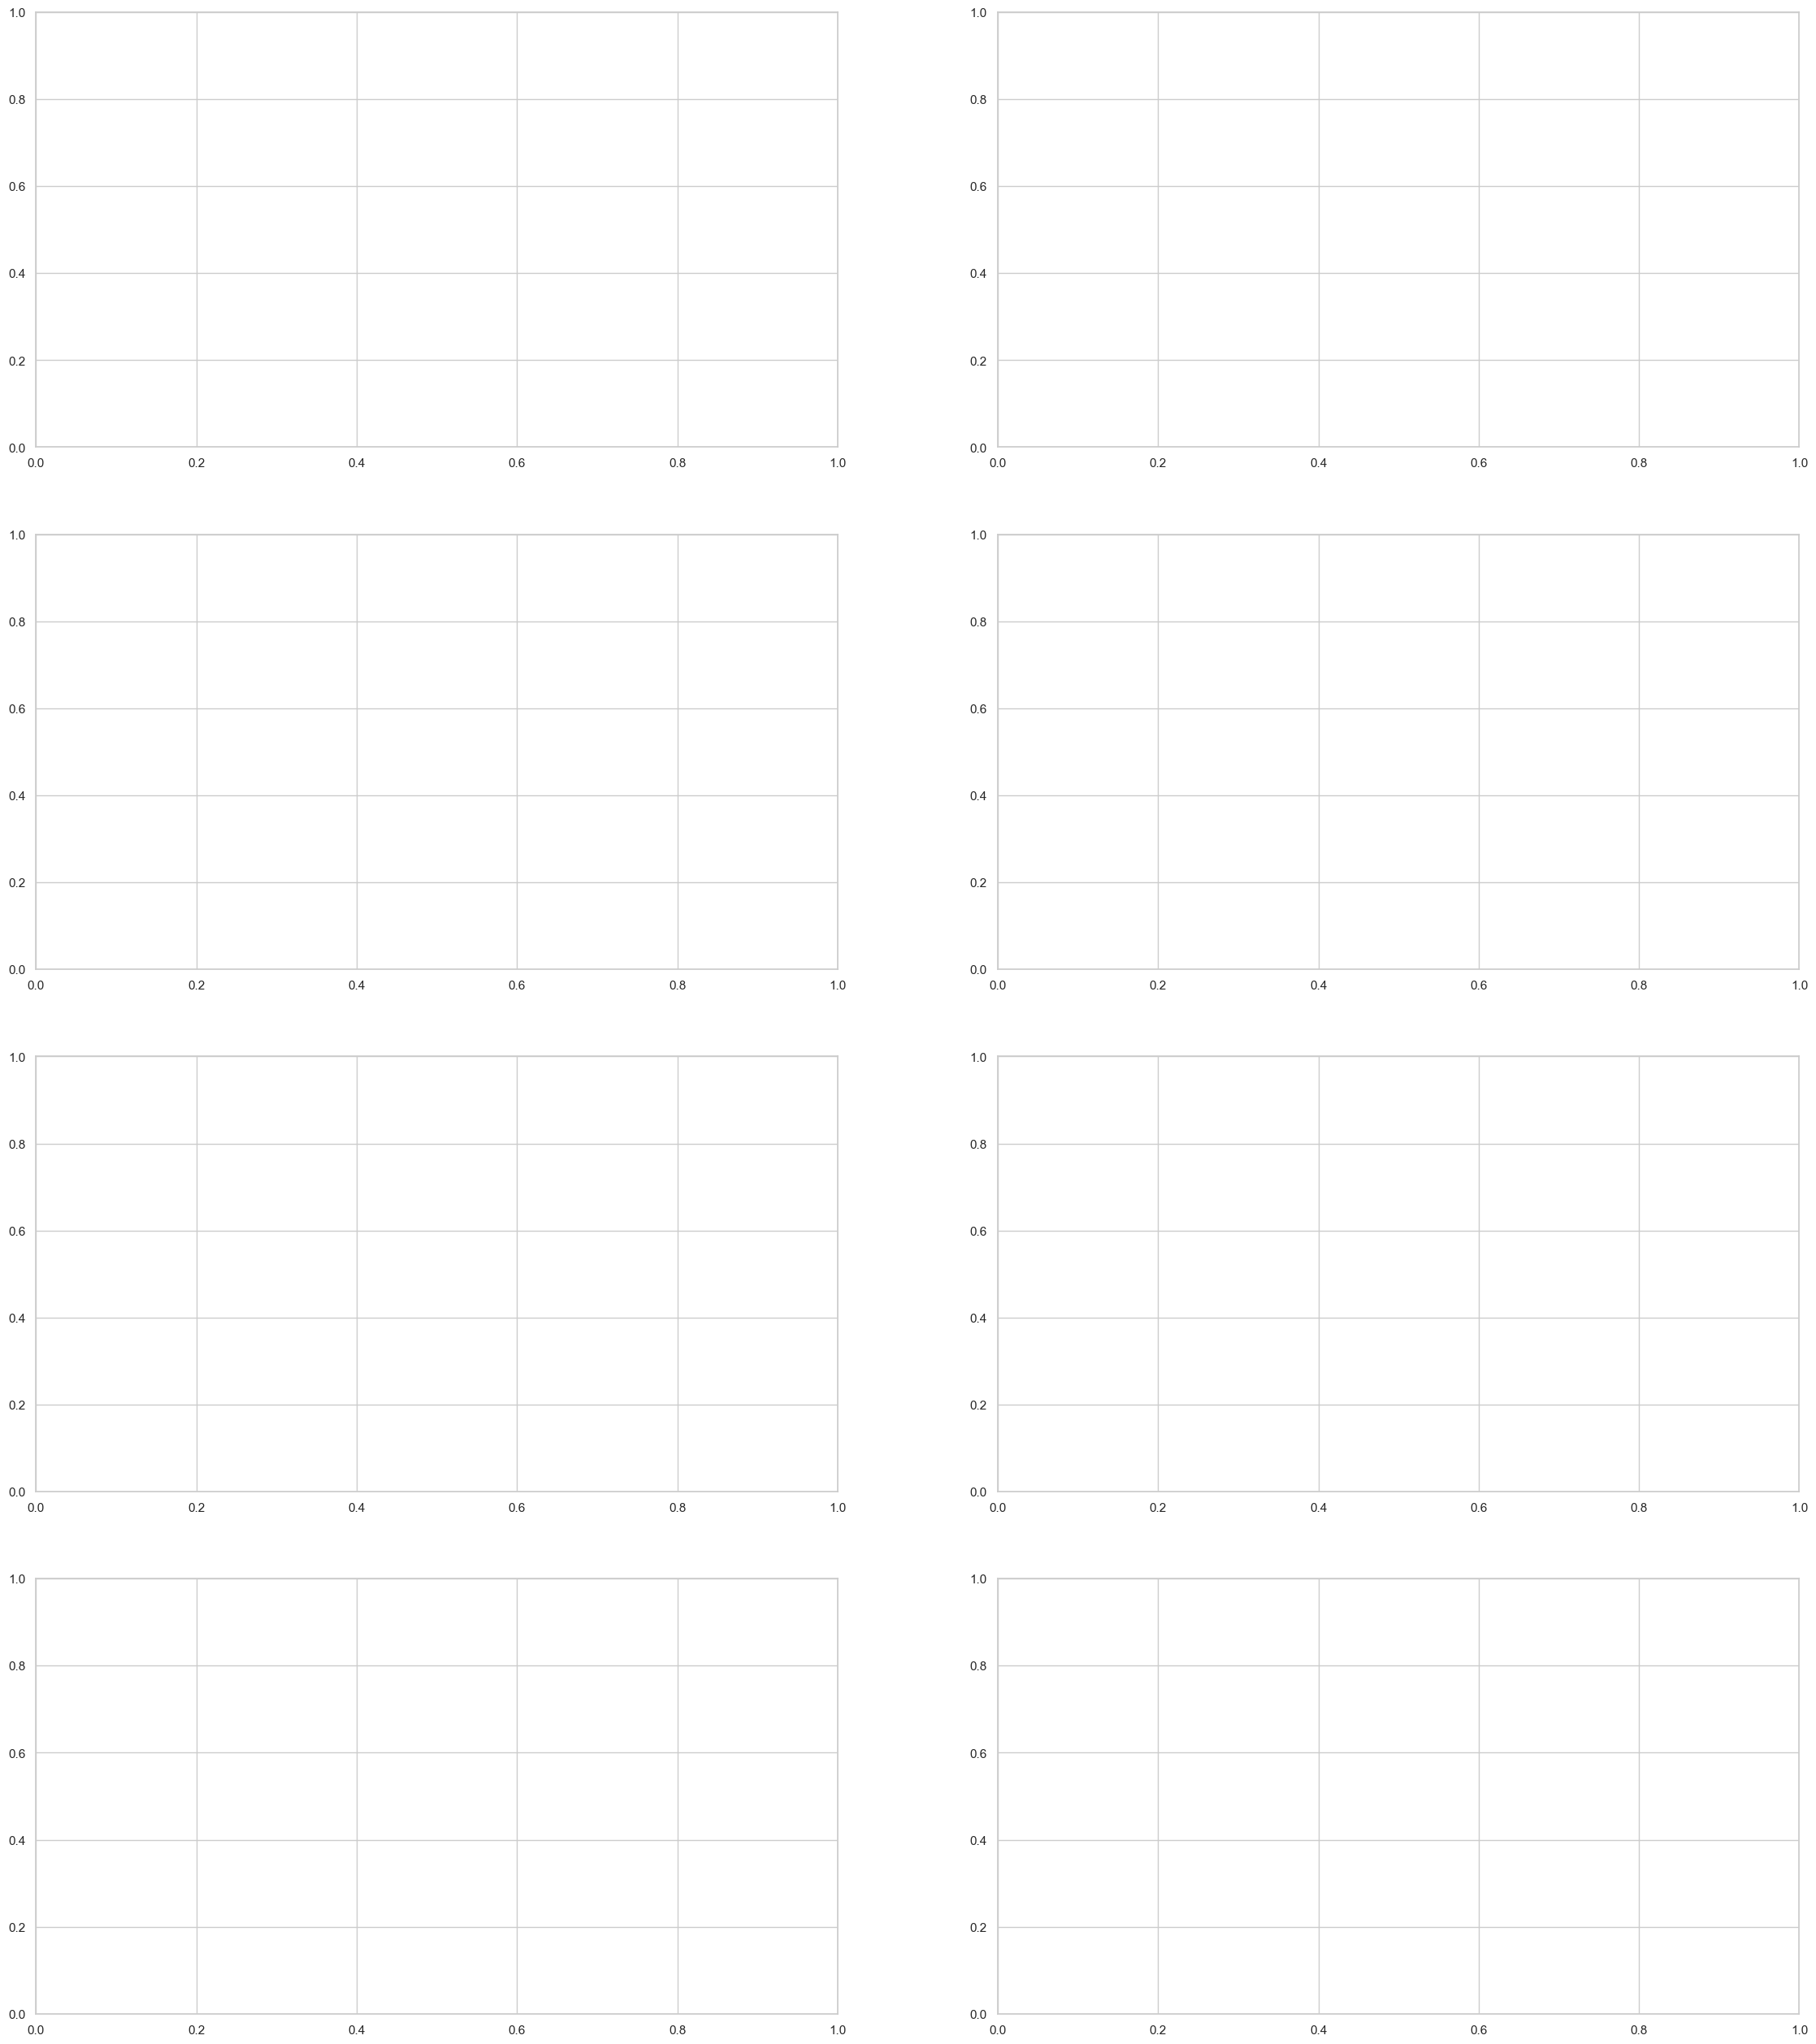

In [67]:

fig, ax = plt.subplots((4),(2), figsize=(28, 32))
sns.set_theme(style="whitegrid")
fig.get_constrained_layout_pads()
log_aum = np.log(selection.aum)
selection['log_aum'] = log_aum

#convert aum to log for plot 
log_aum = np.log(selection.aum)
selection['log_aum'] = log_aum


ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[1,0]
ax4=ax[1,1]
ax5=ax[2,0]
ax6=ax[2,1]
ax7=ax[3,0]
ax8=ax[3,1]

ticker1 = selection.query("'ticker' != 'NUDM'")
ticker2 = selection.query("'ticker' == 'NUDM'")

sns.barplot(x="ticker1", y="dividend_yield", data=selection.sort_values(by='dividend_yield', ascending=False), color='deepskyblue', ax=ax1)
sns.barplot(x="ticker2", y="dividend_yield", data=selection.sort_values(by='dividend_yield', ascending=False), color='firebrick', ax=ax1)
ax1.set_title('Dividend Yield')
ax1.tick_params(labelrotation=60)

sns.barplot(x="ticker1", y="quality_score", data=selection.sort_values(by='quality_score', ascending=False), color='deepskyblue', ax=ax2)
sns.barplot(x="ticker2", y="quality_score", data=selection.sort_values(by='quality_score', ascending=False), color='firebrick', ax=ax2)
ax2.set_title('Quality Score')
ax2.tick_params(labelrotation=60)

sns.barplot(x="ticker1", y="score_peer_rank", data=selection.sort_values(by='score_peer_rank', ascending=False) ,ax=ax3, color='deepskyblue')
sns.barplot(x="ticker2", y="score_peer_rank", data=selection.sort_values(by='score_peer_rank', ascending=False) ,ax=ax3, color='firebrick')
ax3.set_title('score_peer_rank')
ax3.tick_params(labelrotation=60)

sns.barplot(x="ticker1", y="score_global_rank", data=selection.sort_values(by='score_global_rank', ascending=False),color='deepskyblue', ax=ax4)
sns.barplot(x="ticker2", y="score_peer_rank", data=selection.sort_values(by='score_global_rank', ascending=False) ,ax=ax3, color='firebrick')
ax4.set_title('score_global_rank')
ax4.tick_params(labelrotation=60)

sns.barplot(x="ticker1", y="carbon_intensity", data=selection.sort_values(by='carbon_intensity', ascending=False),color='deepskyblue', ax=ax5)
sns.barplot(x="ticker2", y="carbon_intensity", data=selection.sort_values(by='carbon_intensity', ascending=False),color='firebrick', ax=ax5)
ax5.set_title('carbon_intensity')
ax5.tick_params(labelrotation=60)

sns.barplot(x="ticker1", y="expense_ratio", data=selection.sort_values(by='expense_ratio', ascending=False), color='deepskyblue',ax=ax6)
sns.barplot(x="ticker2", y="expense_ratio", data=selection.sort_values(by='expense_ratio', ascending=False), color='firebrick',ax=ax6)
ax6.set_title('carbon_intensity')
ax6.tick_params(labelrotation=60)

sns.barplot(x="ticker1", y= "log_aum", data=selection.sort_values(by = "log_aum", ascending=False), color='deepskyblue',ax=ax7)
sns.barplot(x="ticker2", y= "log_aum", data=selection.sort_values(by = "log_aum", ascending=False), color='firebrick',ax=ax7)
ax7.set_title("log_aum")
ax7.tick_params(labelrotation=60)

sns.barplot(x="ticker1", y='sri_screening_criteria_exposure', data=selection.sort_values(by='sri_screening_criteria_exposure', ascending=False), color='deepskyblue',ax=ax8)
sns.barplot(x="ticker2", y='sri_screening_criteria_exposure', data=selection.sort_values(by='sri_screening_criteria_exposure', ascending=False), color='firebrick',ax=ax8)
ax8.set_title('sri_screening_criteria_exposure')
ax8.tick_params(labelrotation=60)


In [68]:
best = selection.query("esg_rating == 'AAA'").sort_values(by='dividend_yield', ascending=False)
best

,Unnamed: 0,start_config,one_yr_return,expense_ratio,aum,dividend_yield,quality_score,score_peer_rank,score_global_rank,carbon_intensity,...,asset_region,subsegment,ticker,three_mo_p_percent,dividend_yield_cat,carbon_intensity_cat,aum_cat,quality_score_cat,ranking,log_aum
16,984,lightgray,16.45,0.31,365820000.0,2.98,8.77,99.91,100.0,48.61,...,dev_markets,total_market,NUDM,2.55,q4,q1,q3,high,NaN,19.717652


---------

In [69]:
nudm = yf.Ticker('NUDM')

In [77]:
yf.Ticker('NUDM').info
import yfinance as yf
from yfinance import ticker
from yfinance import utils
from yfinance import shared
from yfinance import multi
from yfinance import base
from yfinance import tickers
from yfinance import download




In [87]:

divid=nudm.get_dividends()
info=nudm.get_info()
iholders=nudm.get_institutional_holders()
places=nudm.get_isin()
majorholds=nudm.get_major_holders()
mutholds=nudm.get_mutualfund_holders()
splits=nudm.get_splits()





TypeError: TickerBase.get_dividends() got an unexpected keyword argument 'kwars'

In [157]:
summary = pd.DataFrame.from_dict(info, orient='index')

In [172]:
summary.reset_index(inplace=True)
#print(summary.iloc[1,1])

In [175]:
print(summary.loc[0,0])

In seeking to track the investment results of the index, the advisor attempts to replicate the index by investing all, or substantially all, of its assets in the securities represented in the index in approximately the same proportions as the index. The index identifies equity securities from the base index that satisfy certain ESG criteria, based on ESG performance data collected by MSCI ESG Research, Inc.


In [88]:
iholders

,0,1
0,Net Assets,369.41M
1,NAV,28.39
2,PE Ratio (TTM),15.83
3,Yield,1.73%
4,YTD Daily Total Return,10.12%
5,Beta (5Y Monthly),1.07
6,Expense Ratio (net),0.31%
7,Inception Date,2017-06-06


In [90]:
places

'US67092P8059'

In [91]:
majorholds

,0,1
0,Previous Close,28.41
1,Open,28.59
2,Bid,28.22 x 4000
3,Ask,28.38 x 3200
4,Day's Range,28.22 - 28.54
5,52 Week Range,21.82 - 29.78
6,Volume,42627
7,Avg. Volume,52846


In [78]:
NUDM =nudm.info

In [ ]:
hist.index

In [ ]:
hist = nudm.history(period='max')
hist

In [ ]:
hist = pd.DataFrame(hist, index=hist.index)
hist.describe()



In [ ]:
fig, (ax) = plt.subplots(2,figsize=(20, 20))


ax1.set_xlabel('Date')
ax2.set_ylabel('Close')
ax1.set_xlabel('Date')
ax2.set_ylabel('Volume')
sns.lineplot(data=hist, x=hist.index, y='Close', color='royalblue', ax=ax[0])
sns.lineplot(data=hist, x=hist.index, y='Open', color='firebrick', ax=ax[0])
sns.lineplot(data=hist, x=hist.index, y='High', color='deepskyblue', ax=ax[0])
sns.lineplot(data=hist, x=hist.index, y='Low', color='deeppink', ax=ax[0])
sns.lineplot(data=hist, x=hist.index, y='Volume', color='forestgreen', ax=ax[1])

In [94]:
import numpy as np
(hist['date'])
hist    

NameError: name 'hist' is not defined

In [95]:
selection.ticker

0      VGK
1      EZU
2     BBEU
3     IEUR
4      EWU
5      FEZ
6      IEV
7      EWG
8     EUFN
9     HEDJ
10     EWL
11     EWQ
12     EWP
13    FLGB
14    SPEU
15    DBEU
16    NUDM
17    HEZU
18     EWD
19     EWN
20     FEP
21    EDEN
22     FDD
23     FSZ
24    FLEE
25    EIRL
26    EUDG
27     DAX
28    EUSC
29    NORW
30     EWO
31    FLSW
32    EWUS
33    PTEU
34    DBEZ
35    HEWG
36    FLEH
37    ENOR
38     FKU
39     EWK
40    EFNL
41    FLGR
42    GSEU
43    PGAL
44    DBGR
45    RFEU
46    EUDV
47    HEWU
48    FLFR
Name: ticker, dtype: object

In [96]:
#get tickers from selection

t_list = selection.ticker
for t in t_list:
    t= selection.ticker.str.lower() 
    print(t)

0      vgk
1      ezu
2     bbeu
3     ieur
4      ewu
5      fez
6      iev
7      ewg
8     eufn
9     hedj
10     ewl
11     ewq
12     ewp
13    flgb
14    speu
15    dbeu
16    nudm
17    hezu
18     ewd
19     ewn
20     fep
21    eden
22     fdd
23     fsz
24    flee
25    eirl
26    eudg
27     dax
28    eusc
29    norw
30     ewo
31    flsw
32    ewus
33    pteu
34    dbez
35    hewg
36    fleh
37    enor
38     fku
39     ewk
40    efnl
41    flgr
42    gseu
43    pgal
44    dbgr
45    rfeu
46    eudv
47    hewu
48    flfr
Name: ticker, dtype: object
0      vgk
1      ezu
2     bbeu
3     ieur
4      ewu
5      fez
6      iev
7      ewg
8     eufn
9     hedj
10     ewl
11     ewq
12     ewp
13    flgb
14    speu
15    dbeu
16    nudm
17    hezu
18     ewd
19     ewn
20     fep
21    eden
22     fdd
23     fsz
24    flee
25    eirl
26    eudg
27     dax
28    eusc
29    norw
30     ewo
31    flsw
32    ewus
33    pteu
34    dbez
35    hewg
36    fleh
37    enor
38     fku
39  

In [98]:
from requests import get


for t in t_list:
    T =yq.Ticker('f"{selection.ticker[t]}"')
    print(T)

ts = pd.concat[T, selection.ticker]
print(get.json(0x2d585d990))

TypeError: 'function' object is not subscriptable

In [99]:
s =yq.Ticker('f"{selection.ticker[t]}"')

for t in t_list:
    ts = s.history(period='max')
    print(s)



In [151]:
print(select_ts)

NameError: name 'select_ts' is not defined

In [ ]:
s#elect_ts = pd.DataFrame()
for t in t_list:
    ts = s.history(period='max')
    ts = select_ts
ts = print(ts).to_csv('select_ts.csv')

In [ ]:
print(select_ts)

In [ ]:
import requests
from requests import get
import json
from json import dumps
from json import loads

ts = get(select_ts)

In [ ]:
select_ts = pd.DataFrame(select_ts)

select_ts.to_csv('/Users/kk/Desktop/da_capstone_group3/Team3_App/select_ts.csv')

In [ ]:
ts['date']

In [ ]:
ts.info()

ts['date'] = pd.to_datetime(ts.date)

In [ ]:
for t in t_list:
    T_list = []
    T = yq.Ticker('f"{selection.ticker[t]}"')
    (f'{T}.info') = info[t]
    
    print(info[t])
    



    


    

In [ ]:
for st in t_list:
    ts = pd.to_datetime(ts).reset_index(inplace=True)
    print(ts)

In [ ]:
for t in t_list:
    ts['date'] = pd.to_datetime(ts['date'])
    print(ts)

In [150]:
import yahooquery as yq 
from yahooquery import Ticker 
from yahooquery import Screener
from yfinance import ticker
import googlefinance as gf
from googlefinance import getQuotes
from json import normalize

t_list = selection.ticker
for t in t_list:
    t= selection.ticker.str.lower() 

t = yf.Ticker('f"{selection.ticker}"')

for t in t_list:
    
    t = yf.Ticker('f"{selection.ticker}"')
    print(f'"{t}"'.info)



ImportError: cannot import name 'normalize' from 'json' (c:\Users\User\anaconda3\envs\standard_env\Lib\json\__init__.py)

In [148]:

# List of ticker symbols
ticker_symbols = ('f"{selection.ticker}"') # Add more tickers as needed

# Initialize an empty DataFrame to store combined holdings
combined_holdings = pd.DataFrame()

for ticker in ticker_symbols:
    # Fetch fund holding info for the current ticker
    fund = yf.Ticker('f"{selection.ticker}"')
    fund_holdings = fund.fund_holding_info
    
    # Create DataFrame for current fund's holdings
    if ticker.lower() in fund_holdings:
        df = pd.DataFrame(fund_holdings[ticker.lower()]['holdings'])
        
        # Add a column for the current ticker symbol
        df['Ticker'] = ticker
        
        # Append the current fund's holdings to the combined DataFrame
        combined_holdings = combined_holdings.append(df, ignore_index=True)

# Print the combined holdings DataFrame
print(combined_holdings.head())


AttributeError: 'Ticker' object has no attribute 'fund_holding_info'

In [103]:
t_list = selection.ticker
for t in t_list:
    t= selection.ticker.str.lower() 


for t in t_list:
    yf_list = []
    yf_tic = yf.Ticker(f'selection.ticker["{t}"]')
    yf_list.append(yf_tic)
    print(yf_list)



[yfinance.Ticker object <SELECTION.TICKER["VGK"]>]
[yfinance.Ticker object <SELECTION.TICKER["EZU"]>]
[yfinance.Ticker object <SELECTION.TICKER["BBEU"]>]
[yfinance.Ticker object <SELECTION.TICKER["IEUR"]>]
[yfinance.Ticker object <SELECTION.TICKER["EWU"]>]
[yfinance.Ticker object <SELECTION.TICKER["FEZ"]>]
[yfinance.Ticker object <SELECTION.TICKER["IEV"]>]
[yfinance.Ticker object <SELECTION.TICKER["EWG"]>]
[yfinance.Ticker object <SELECTION.TICKER["EUFN"]>]
[yfinance.Ticker object <SELECTION.TICKER["HEDJ"]>]
[yfinance.Ticker object <SELECTION.TICKER["EWL"]>]
[yfinance.Ticker object <SELECTION.TICKER["EWQ"]>]
[yfinance.Ticker object <SELECTION.TICKER["EWP"]>]
[yfinance.Ticker object <SELECTION.TICKER["FLGB"]>]
[yfinance.Ticker object <SELECTION.TICKER["SPEU"]>]
[yfinance.Ticker object <SELECTION.TICKER["DBEU"]>]
[yfinance.Ticker object <SELECTION.TICKER["NUDM"]>]
[yfinance.Ticker object <SELECTION.TICKER["HEZU"]>]
[yfinance.Ticker object <SELECTION.TICKER["EWD"]>]
[yfinance.Ticker objec

In [104]:

fund = yq.Ticker('f"{t}"')
fund.fund_holding_info.keys()
#dict_keys(['hasgx'])

for t in selection.ticker:
    fund = yq.Ticker('f"{selection.ticker[t]}"')
    print(fund.fund_holding_info.keys())
from yahooquery import Ticker
from yfinance import ticker        
from yahooquery import Screener
import yahooquery as yq
import yahooquery
from yahooquery import get fetch                    

df_fund = pd.DataFrame(fund.get_holdings['ewu']['holdings'])

ewu = pd.DataFrame(fund_holding_info['ewu']['holdings'])

print(ewu)

SyntaxError: invalid syntax (181518991.py, line 13)

In [105]:
nudm=yq.Ticker('NUDM')
nudm.get_trend_details

AttributeError: 'Ticker' object has no attribute 'get_trend_details'

In [106]:
import yfinance as yf
nudm=yf.Ticker("NUDM")
fetch(nudm.info)

('NUDM')

NameError: name 'fetch' is not defined

In [107]:

from yahooquery import fund
ticker('VGK') =  vgk.fund.get_['VGK']['holdings']

print(nudm)

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (2651066031.py, line 2)

In [144]:
nudm=yf.Ticker('NUDM')
print(nudm.get_trend_details)





<bound method TickerBase.get_trend_details of yfinance.Ticker object <NUDM>>


In [145]:
print(nudm.fund_holding_info.keys('yf_list'))

AttributeError: 'Ticker' object has no attribute 'fund_holding_info'

In [110]:
t_list = selection.ticker
for t in t_list:
    t= selection.ticker.str.lower() 
    print(t)

0      vgk
1      ezu
2     bbeu
3     ieur
4      ewu
5      fez
6      iev
7      ewg
8     eufn
9     hedj
10     ewl
11     ewq
12     ewp
13    flgb
14    speu
15    dbeu
16    nudm
17    hezu
18     ewd
19     ewn
20     fep
21    eden
22     fdd
23     fsz
24    flee
25    eirl
26    eudg
27     dax
28    eusc
29    norw
30     ewo
31    flsw
32    ewus
33    pteu
34    dbez
35    hewg
36    fleh
37    enor
38     fku
39     ewk
40    efnl
41    flgr
42    gseu
43    pgal
44    dbgr
45    rfeu
46    eudv
47    hewu
48    flfr
Name: ticker, dtype: object
0      vgk
1      ezu
2     bbeu
3     ieur
4      ewu
5      fez
6      iev
7      ewg
8     eufn
9     hedj
10     ewl
11     ewq
12     ewp
13    flgb
14    speu
15    dbeu
16    nudm
17    hezu
18     ewd
19     ewn
20     fep
21    eden
22     fdd
23     fsz
24    flee
25    eirl
26    eudg
27     dax
28    eusc
29    norw
30     ewo
31    flsw
32    ewus
33    pteu
34    dbez
35    hewg
36    fleh
37    enor
38     fku
39  

In [111]:

for t in t_list:
    
    t = yf.Ticker('f"{selection.ticker}"')
    print(f'"{t}"'.info)

AttributeError: 'str' object has no attribute 'info'

In [112]:
t_list = selection.ticker
for t in t_list:
    t= selection.ticker.str.lower() 
    print(t)



0      vgk
1      ezu
2     bbeu
3     ieur
4      ewu
5      fez
6      iev
7      ewg
8     eufn
9     hedj
10     ewl
11     ewq
12     ewp
13    flgb
14    speu
15    dbeu
16    nudm
17    hezu
18     ewd
19     ewn
20     fep
21    eden
22     fdd
23     fsz
24    flee
25    eirl
26    eudg
27     dax
28    eusc
29    norw
30     ewo
31    flsw
32    ewus
33    pteu
34    dbez
35    hewg
36    fleh
37    enor
38     fku
39     ewk
40    efnl
41    flgr
42    gseu
43    pgal
44    dbgr
45    rfeu
46    eudv
47    hewu
48    flfr
Name: ticker, dtype: object
0      vgk
1      ezu
2     bbeu
3     ieur
4      ewu
5      fez
6      iev
7      ewg
8     eufn
9     hedj
10     ewl
11     ewq
12     ewp
13    flgb
14    speu
15    dbeu
16    nudm
17    hezu
18     ewd
19     ewn
20     fep
21    eden
22     fdd
23     fsz
24    flee
25    eirl
26    eudg
27     dax
28    eusc
29    norw
30     ewo
31    flsw
32    ewus
33    pteu
34    dbez
35    hewg
36    fleh
37    enor
38     fku
39  

In [113]:
print(ewu_HOLD)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('EWU Holdings')
ax.tick_params(labelrotation=60)
sns.barplot(x='holdingName', y= 'holdingPercent', data=ewu_HOLD.sort_values(by='holdingPercent', ascending=False), color='deepskyblue')

NameError: name 'ewu_HOLD' is not defined

---------

In [115]:
import pandas as pd
import yahooquery as yq
from yahooquery import Ticker
from yfinance import ticker
import yahooquery.misc 
import yahooquery.screener
import yahooquery.utils
import yahooquery.research

import yq_Ticker_object
import yfinance as yf
import time


ModuleNotFoundError: No module named 'yq_Ticker_object'

In [117]:
# Create a Ticker object for the ticker symbol 'SPY'
ticker_obj = yq.ticker.Ticker('NUDM')

# Get the fund holding information in JSON format
nudm_info_json = ticker_obj.fund_holding_info

# Convert the JSON dictionary to a pandas DataFrame
fund_info_df = pd.DataFrame(fund_info_json['NUDM']['holdings'])

# Print the DataFrame
#print(fund_info_df)
fund_info_df


NameError: name 'fund_info_json' is not defined

In [118]:
import pandas as pd
for t in t_list:
    yq_list = [] 
    t = yq.Ticker('f"{selection.ticker[t]}"')
    ticker_obj = fund
    nudm.fund_get_holdings(T)
    yq_list.append(ticker_obj)
    pd.to_Dataframe(yq_list)

NameError: name 'fund' is not defined

In [119]:
t_list = selection.ticker
for t in t_list:
    T= selection.ticker
    print(f"'{T}'")

'0      VGK
1      EZU
2     BBEU
3     IEUR
4      EWU
5      FEZ
6      IEV
7      EWG
8     EUFN
9     HEDJ
10     EWL
11     EWQ
12     EWP
13    FLGB
14    SPEU
15    DBEU
16    NUDM
17    HEZU
18     EWD
19     EWN
20     FEP
21    EDEN
22     FDD
23     FSZ
24    FLEE
25    EIRL
26    EUDG
27     DAX
28    EUSC
29    NORW
30     EWO
31    FLSW
32    EWUS
33    PTEU
34    DBEZ
35    HEWG
36    FLEH
37    ENOR
38     FKU
39     EWK
40    EFNL
41    FLGR
42    GSEU
43    PGAL
44    DBGR
45    RFEU
46    EUDV
47    HEWU
48    FLFR
Name: ticker, dtype: object'
'0      VGK
1      EZU
2     BBEU
3     IEUR
4      EWU
5      FEZ
6      IEV
7      EWG
8     EUFN
9     HEDJ
10     EWL
11     EWQ
12     EWP
13    FLGB
14    SPEU
15    DBEU
16    NUDM
17    HEZU
18     EWD
19     EWN
20     FEP
21    EDEN
22     FDD
23     FSZ
24    FLEE
25    EIRL
26    EUDG
27     DAX
28    EUSC
29    NORW
30     EWO
31    FLSW
32    EWUS
33    PTEU
34    DBEZ
35    HEWG
36    FLEH
37    ENOR
38     FKU
3

In [120]:
t_list = selection.ticker
for t in t_list:
    t= selection.ticker.str.lower() 
    print(t)

0      vgk
1      ezu
2     bbeu
3     ieur
4      ewu
5      fez
6      iev
7      ewg
8     eufn
9     hedj
10     ewl
11     ewq
12     ewp
13    flgb
14    speu
15    dbeu
16    nudm
17    hezu
18     ewd
19     ewn
20     fep
21    eden
22     fdd
23     fsz
24    flee
25    eirl
26    eudg
27     dax
28    eusc
29    norw
30     ewo
31    flsw
32    ewus
33    pteu
34    dbez
35    hewg
36    fleh
37    enor
38     fku
39     ewk
40    efnl
41    flgr
42    gseu
43    pgal
44    dbgr
45    rfeu
46    eudv
47    hewu
48    flfr
Name: ticker, dtype: object
0      vgk
1      ezu
2     bbeu
3     ieur
4      ewu
5      fez
6      iev
7      ewg
8     eufn
9     hedj
10     ewl
11     ewq
12     ewp
13    flgb
14    speu
15    dbeu
16    nudm
17    hezu
18     ewd
19     ewn
20     fep
21    eden
22     fdd
23     fsz
24    flee
25    eirl
26    eudg
27     dax
28    eusc
29    norw
30     ewo
31    flsw
32    ewus
33    pteu
34    dbez
35    hewg
36    fleh
37    enor
38     fku
39  

In [121]:

ticker_obj[t] = yq.ticker.Ticker(T)
for t in t_list: 
    ticker_obj['f"{t}"'] = yq.ticker.Ticker('f"{T}"')
    T_objects = []
    T_objects.append(ticker_obj)
    print(T_objects)



TypeError: 'Ticker' object does not support item assignment

In [122]:
ticker_obj = yq.ticker.Ticker('NUDM')

In [123]:
fund_info_json = ticker_obj.fund_holding_info

In [124]:

fund_info_df = pd.DataFrame(fund_info_json['NUDM']['holdings'])

In [125]:
fund_info_df

,symbol,holdingName,holdingPercent
0,NESN,Nestle SA,0.032693
1,ASML,ASML Holding NV,0.023637
2,SIE,Siemens AG,0.020276
3,6758,Sony Group Corp,0.019094
4,NOVO B,Novo Nordisk A/S Class B,0.018150
5,AZN,AstraZeneca PLC,0.016967
6,GSK,GSK PLC,0.016883
7,7267,Honda Motor Co Ltd,0.016807
8,CS,AXA SA,0.016119
9,6752,Panasonic Holdings Corp,0.016042


In [126]:
fund_info_df.holdingPercent.sum()

0.196669498

In [127]:
nudm.asset_profile['NUDM']['holdings']

AttributeError: 'Ticker' object has no attribute 'asset_profile'

In [128]:
fund_info_df = pd.DataFrame(fund_info_json['NUDM']['asset'])

KeyError: 'asset'

In [129]:
fund = Ticker('NUDM')
weights = fund.fund_sector_weightings

In [147]:
plt(weights)

TypeError: 'module' object is not callable

In [131]:
weights.sum()

NUDM    0.9869
dtype: float64

In [132]:
nudm = yq.Ticker('NUDM')
yq.find_all_modules(nudm)

AttributeError: module 'yahooquery' has no attribute 'find_all_modules'

In [133]:
pd.read_json(nudm.all_financial_data)

ValueError: Invalid file path or buffer object type: <class 'method'>

In [134]:
from git import FetchInfo


FetchInfo(get.json.0x286d41c90)

SyntaxError: invalid decimal literal (189441969.py, line 4)

In [135]:
data["ds"] = pd.to_datetime(data["ds"], format="%Y-%m-%d")

pd.to_Series(data)

NameError: name 'data' is not defined

In [34]:
data.columns = data[ds, y] 

NameError: name 'data' is not defined

In [35]:
data =data.set_index('ds')
print(data)

NameError: name 'data' is not defined

In [36]:
data.ds = pd.to_datetime(data.ds)

NameError: name 'data' is not defined

In [37]:
nmdm.

SyntaxError: invalid syntax (2146954680.py, line 1)

In [136]:
import prophet
from prophet import Prophet

data =data.set_index('ds')


ModuleNotFoundError: No module named 'prophet'

In [137]:
data = data.rename(columns={'ds':'ds', 'y':'y'})

NameError: name 'data' is not defined

In [138]:
data= pd.to_datetime(data.index)

NameError: name 'data' is not defined

In [ ]:
data

In [139]:
nudm.data=('ds', y, daily_seasonality=True)
prophet = Prophet(daily_seasonality=True) 
prophet.fit(data)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3322207091.py, line 1)

__________


In [140]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)

NameError: name 'Prophet' is not defined

prophet
xgboost
(s)amira
lin_reg
log_reg
mcmc


In [ ]:
hist

In [ ]:
data = hist['Close']
data

In [ ]:
data = data.reset_index()

In [141]:
data.index
data= data.rename(columns= {'Date':'ds', 'Close':'y'}, inplace=True).set_index('ds')
data.head()

NameError: name 'data' is not defined

In [ ]:
print(data) 

In [ ]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)


In [ ]:
from prophet import Prophet()